In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score


from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


# Get the DATA:

In [ ]:
df = pd.read_excel("/content/drive/My Drive/PostTrauma/AfricaML.xlsx")
df

,PartID,Country,Sex,Age,AgeCAT,Area,Maritial_Status,Employ,Educ,TE1,...,FullFour_cat,jAjD_PG,World_views_total,Depress_total,Anx_total,lectot,count_stressorsAjd,lost1y,lost5y,lostperson
0,134709551,1,1,27,3,2,1,3,4,0,...,4,1,1.25,2.0,2.0,3,5,2,0,2
1,134748522,1,1,24,2,1,2,3,4,0,...,4,1,1.00,2.0,1.8,3,7,2,0,2
2,134972199,1,1,21,2,3,2,1,4,0,...,4,1,1.75,1.6,1.8,0,0,1,1,6
3,134995033,1,2,24,2,1,1,1,4,0,...,4,1,1.50,2.0,2.0,5,8,2,0,2
4,134999630,1,2,24,2,1,2,2,4,0,...,4,1,1.00,2.0,2.0,3,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,134994364,3,1,48,5,1,1,3,4,0,...,1,2,2.25,1.2,1.0,5,6,2,1,1
2520,134995359,3,2,31,3,3,1,1,4,0,...,1,0,2.75,1.8,1.2,6,7,1,2,2
2521,134995908,3,2,21,2,1,2,1,4,0,...,1,0,3.25,1.6,1.4,7,6,1,1,14
2522,134999355,3,2,31,3,1,1,5,4,0,...,1,2,3.00,1.0,1.4,7,10,2,2,18


In [ ]:
df_labels = pd.read_excel("/content/drive/My Drive/PostTrauma/labels_documentation.xlsx")
df_labels.loc[:, ["PartID", "Participation ID"]]

,PartID,Participation ID
0,Country,In what country do you live?
1,Sex,What is your sex/ gender?
2,Age,What is your age?
3,AgeCAT,Age category Punched
4,Area,In which area do you live?
...,...,...
80,lectot,number of traumatic events
81,count_stressorsAjd,number of AjD stressors adnme
82,lost1y,Did you experience loss (death of a loved one)...
83,lost5y,How many people did you lose (death of loved o...


In [ ]:
all_lables = ['PartID', 'Country', 'Sex', 'Age', 'AgeCAT', 'Area', 'Maritial_Status',
       'Employ', 'Educ', 'Depress_total', 'Anx_total', 'abuse1', 'abuse2', 'abuse3', 'abuse4',
       'abuse5', 'abuse6', 'lost1y', 'lost5y', 'lostperson', 'Worldview1', 'Worldview2', 'Worldview3', 'Worldview4', 'World_views_total', 'TE1', 'TE2', 'TE3', 'TE4', 'TE5', 'TE6', 'TE7',
       'TE8', 'TE9', 'TE10', 'TE11', 'TE12', 'TE13', 'TE14', 'TE15', 'TE16',  'lectot',
       'significantevent', 'timeevent', 'SE1', 'SE2', 'SE3', 'SE4', 'SE5',
       'SE6', 'SE7', 'SE8', 'SE9', 'SE10', 'SE11', 'SE12', 'SE13', 'SE14',
       'SE15', 'SE16', 'count_stressorsAjd', 'REdx',
       'AVdx', 'SoTdx', 'PTSDFIdx', 'PTSDdx', 'ADdx', 'NSCdx', 'DRdx',
       'CPTSDFIdx', 'DSOdx', 'FullCPTSDo', 'Fulldx', 'PRE', 'FTA', 'Essence',
       'Severity', 'ICGRPOSTOT', 'AjD', 'PTSD', 'CPTSD', 'FullDiag', 'AjDdiag',
       'ICGR', 'FullFour_cat', 'jAjD_PG']
lables_to_drop = ['timeevent',  'REdx', 'AVdx', 'SoTdx', 'PTSDFIdx', 'PTSDdx', 'ADdx', 'NSCdx',
        'DRdx',  'CPTSDFIdx', 'DSOdx', 'FullCPTSDo', 'Fulldx', 'PRE', 'FTA',
        'Essence', 'Severity', 'ICGRPOSTOT', 'AjD', 'PTSD', 'CPTSD', 'FullDiag',
        'AjDdiag', 'ICGR']
lables = [lable for lable in all_lables if lable not in lables_to_drop]
lables

['PartID',
 'Country',
 'Sex',
 'Age',
 'AgeCAT',
 'Area',
 'Maritial_Status',
 'Employ',
 'Educ',
 'Depress_total',
 'Anx_total',
 'abuse1',
 'abuse2',
 'abuse3',
 'abuse4',
 'abuse5',
 'abuse6',
 'lost1y',
 'lost5y',
 'lostperson',
 'Worldview1',
 'Worldview2',
 'Worldview3',
 'Worldview4',
 'World_views_total',
 'TE1',
 'TE2',
 'TE3',
 'TE4',
 'TE5',
 'TE6',
 'TE7',
 'TE8',
 'TE9',
 'TE10',
 'TE11',
 'TE12',
 'TE13',
 'TE14',
 'TE15',
 'TE16',
 'lectot',
 'significantevent',
 'SE1',
 'SE2',
 'SE3',
 'SE4',
 'SE5',
 'SE6',
 'SE7',
 'SE8',
 'SE9',
 'SE10',
 'SE11',
 'SE12',
 'SE13',
 'SE14',
 'SE15',
 'SE16',
 'count_stressorsAjd',
 'FullFour_cat',
 'jAjD_PG']

In [ ]:
# get only the variables we want
df = df[lables]
df

,PartID,Country,Sex,Age,AgeCAT,Area,Maritial_Status,Employ,Educ,Depress_total,...,SE10,SE11,SE12,SE13,SE14,SE15,SE16,count_stressorsAjd,FullFour_cat,jAjD_PG
0,134709551,1,1,27,3,2,1,3,4,2.0,...,0,1,1,0,0,0,0,5,4,1
1,134748522,1,1,24,2,1,2,3,4,2.0,...,0,1,1,0,0,0,0,7,4,1
2,134972199,1,1,21,2,3,2,1,4,1.6,...,0,0,0,0,0,0,0,0,4,1
3,134995033,1,2,24,2,1,1,1,4,2.0,...,1,0,1,0,0,0,1,8,4,1
4,134999630,1,2,24,2,1,2,2,4,2.0,...,0,0,0,0,0,1,0,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,134994364,3,1,48,5,1,1,3,4,1.2,...,1,1,1,0,0,0,1,6,1,2
2520,134995359,3,2,31,3,3,1,1,4,1.8,...,0,1,1,0,0,1,0,7,1,0
2521,134995908,3,2,21,2,1,2,1,4,1.6,...,0,1,1,0,0,1,0,6,1,0
2522,134999355,3,2,31,3,1,1,5,4,1.0,...,1,1,1,0,0,1,0,10,1,2


In [ ]:
categorial_variables = ['Country', 'Sex', 'Area', 'Maritial_Status', 'Employ', 'Educ','abuse4','lost1y', 'lostperson','significantevent', 'TE1', 'TE2', 'TE3', 'TE4', 'TE5', 'TE6', 'TE7','TE8', 'TE9', 'TE10', 'TE11', 'TE12', 'TE13', 'TE14', 'TE15', 'TE16',  'SE1', 'SE2', 'SE3', 'SE4', 'SE5','SE6', 'SE7', 'SE8', 'SE9', 'SE10', 'SE11', 'SE12', 'SE13', 'SE14','SE15', 'SE16']
numerical_variables = ['Age', 'AgeCAT',  'Depress_total', 'Anx_total', 'abuse1', 'abuse2', 'abuse3',  'abuse5', 'abuse6', 'lost5y', 'Worldview1', 'Worldview2', 'Worldview3', 'Worldview4', 'World_views_total', 'lectot', 'count_stressorsAjd']
to_predict_variables = ['FullFour_cat']

# check if there are empty values (NAN)

In [ ]:
# there is every ID only once
df['PartID'].nunique()

2524

In [ ]:
# it means we don't have empty (none) values
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

# numerical variables plot:

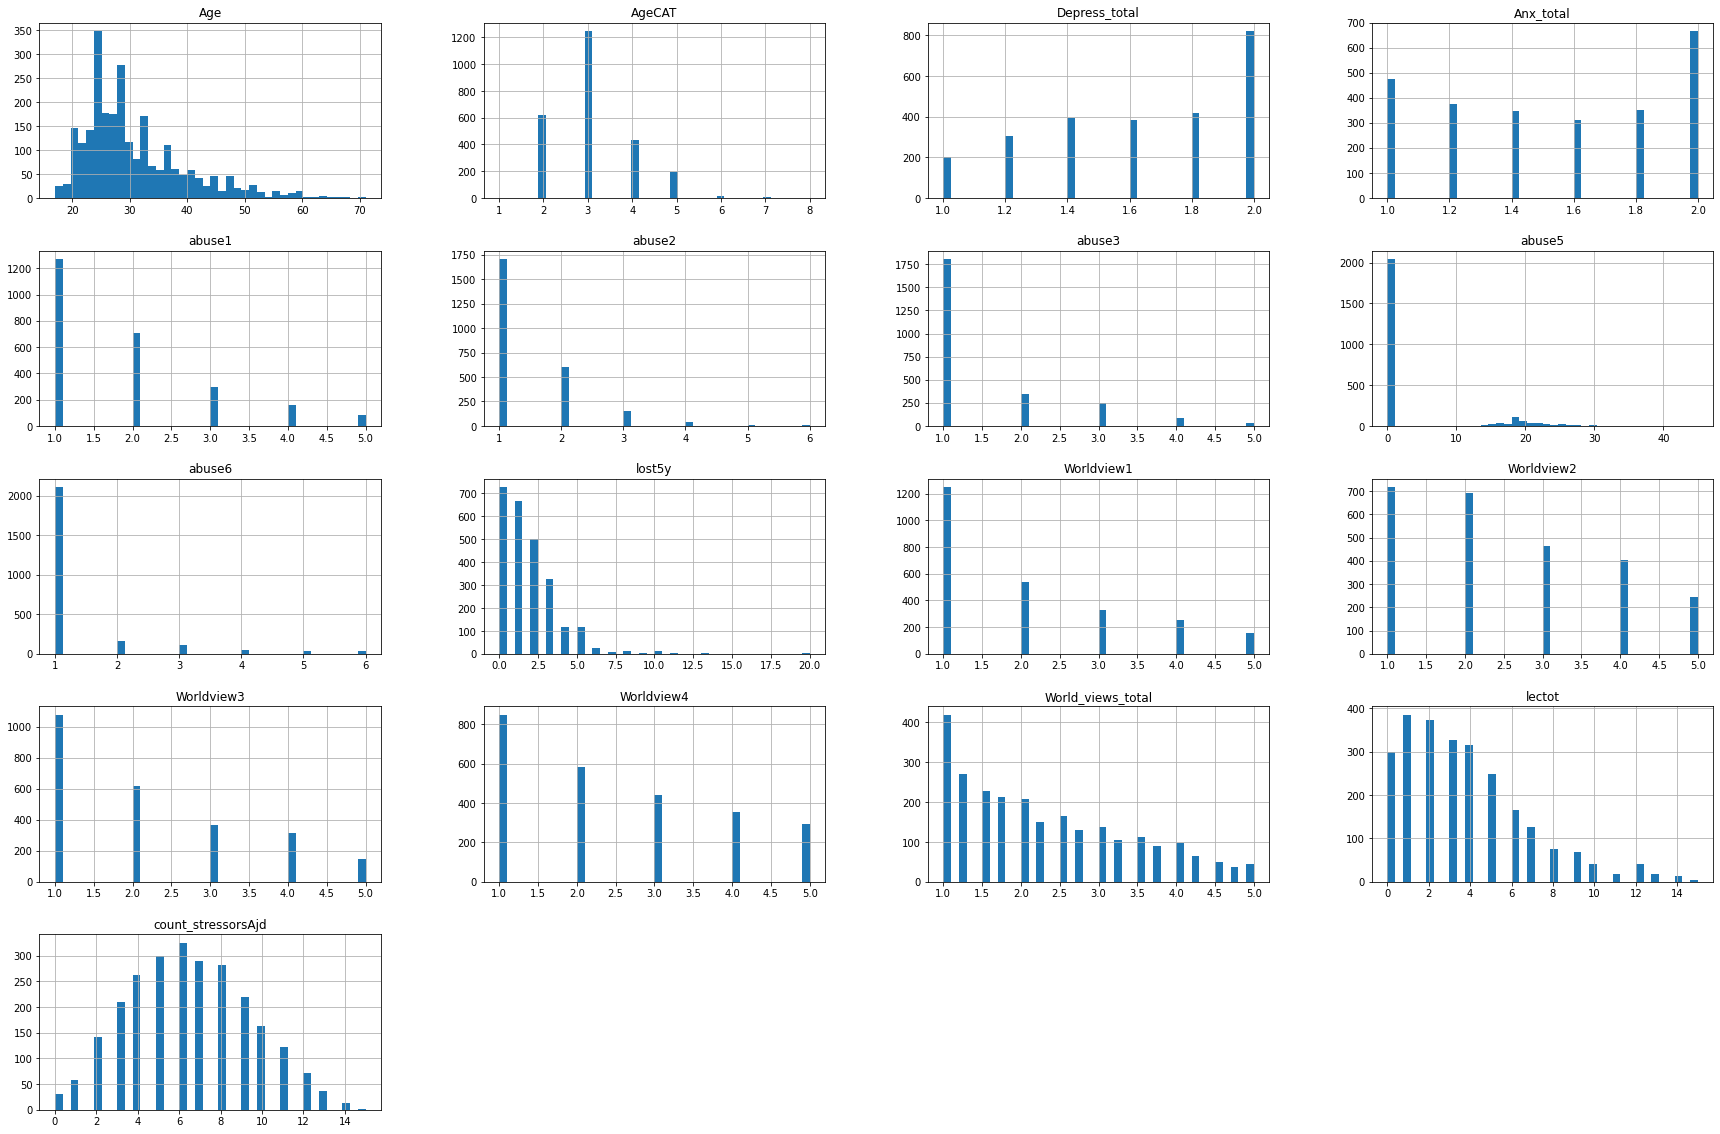

In [ ]:
atttibutes_hist = df[numerical_variables].hist(bins=40, figsize=(30,20))

# categorial variables plot:

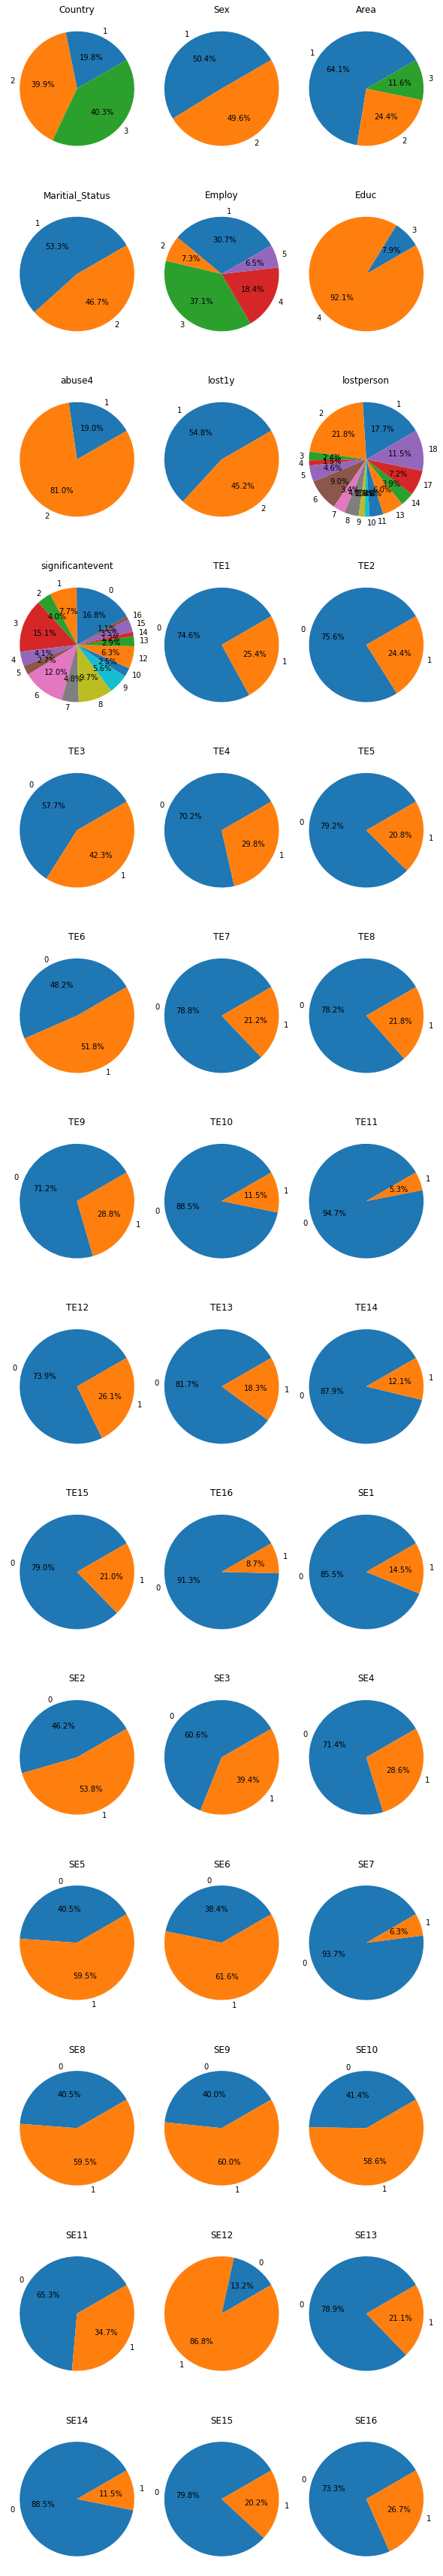

In [ ]:
attibutes_pie = []
for cat in categorial_variables:
    attibutes_pie.append(df[cat].value_counts())
    
fig, axes = plt.subplots(14, 3, figsize=(80, 80))

for i, (idx, row) in enumerate(pd.DataFrame(attibutes_pie).iterrows()):
    ax = axes[int(i / 3), i % 3]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30, autopct='%1.1f%%')
    ax.set_title(idx)

fig.subplots_adjust(left=0.2,
                    bottom=0.2, 
                    right=0.3, 
                    top=0.8, 
                    wspace=0.01, 
                    hspace=0.01)

# variables to predict plot:

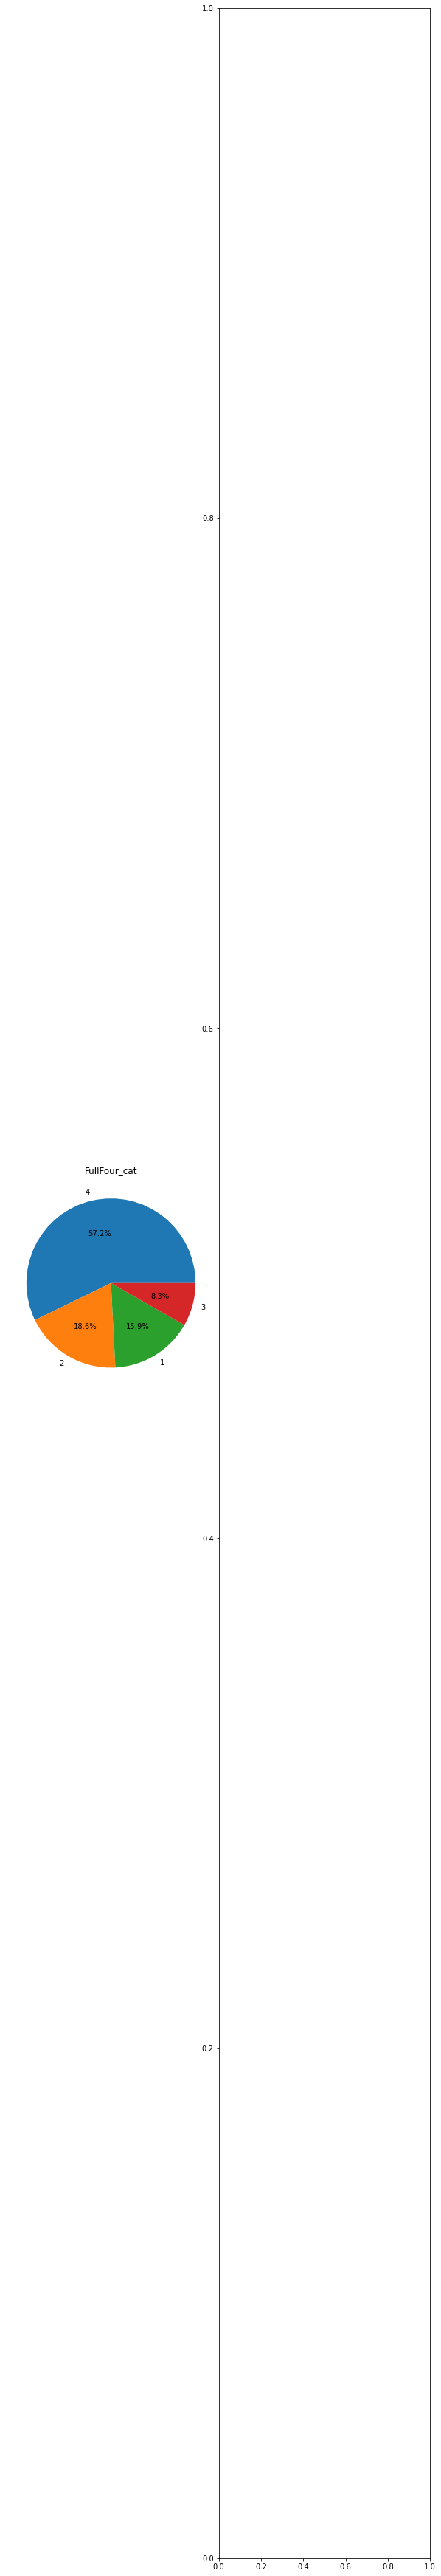

In [ ]:
attibutes_pie = []
for cat in to_predict_variables:
    attibutes_pie.append(df[cat].value_counts())
    
fig, axes = plt.subplots(1, 2, figsize=(80, 80))

for i, (idx, row) in enumerate(pd.DataFrame(attibutes_pie).iterrows()):
    ax = axes[i % 2]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, autopct='%1.1f%%')
    ax.set_title(idx)

fig.subplots_adjust(left=0.2,
                    bottom=0.2, 
                    right=0.3, 
                    top=0.8, 
                    wspace=0.01, 
                    hspace=0.01)

([<matplotlib.patches.Wedge at 0x7f1235824710>,
 [Text(-0.24706083616715185, 1.0718959572796176, 'None'),
  Text(-0.5586721256007814, -0.9475681801731762, 'PTSD'),
  Text(0.5762654178295428, -0.9369728748548395, 'CPTSD'),
  Text(1.062989467340684, -0.28293708191534234, 'DSO')],
 [Text(-0.1347604560911737, 0.5846705221525187, '57.2%'),
  Text(-0.3047302503276989, -0.5168553710035506, '18.6%'),
  Text(0.31432659154338694, -0.5110761135571852, '15.9%'),
  Text(0.5798124367312821, -0.15432931740836853, '8.3%')])

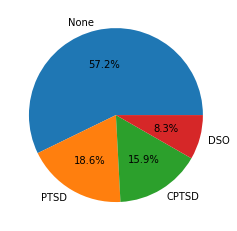

In [ ]:
plt.pie(df[to_predict_variables[0]].value_counts(), labels = ['None', 'PTSD', 'CPTSD', 'DSO'], autopct='%1.1f%%')

In [ ]:
df[cat].value_counts()

4    1444
2     470
1     401
3     209
Name: FullFour_cat, dtype: int64

In [ ]:
# fix value in abuse5 variable:
df.loc[df["abuse5"] == 0, "abuse5"] = 999
df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,PartID,Country,Sex,Age,AgeCAT,Area,Maritial_Status,Employ,Educ,Depress_total,...,SE10,SE11,SE12,SE13,SE14,SE15,SE16,count_stressorsAjd,FullFour_cat,jAjD_PG
0,134709551,1,1,27,3,2,1,3,4,2.0,...,0,1,1,0,0,0,0,5,4,1
1,134748522,1,1,24,2,1,2,3,4,2.0,...,0,1,1,0,0,0,0,7,4,1
2,134972199,1,1,21,2,3,2,1,4,1.6,...,0,0,0,0,0,0,0,0,4,1
3,134995033,1,2,24,2,1,1,1,4,2.0,...,1,0,1,0,0,0,1,8,4,1
4,134999630,1,2,24,2,1,2,2,4,2.0,...,0,0,0,0,0,1,0,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,134994364,3,1,48,5,1,1,3,4,1.2,...,1,1,1,0,0,0,1,6,1,2
2520,134995359,3,2,31,3,3,1,1,4,1.8,...,0,1,1,0,0,1,0,7,1,0
2521,134995908,3,2,21,2,1,2,1,4,1.6,...,0,1,1,0,0,1,0,6,1,0
2522,134999355,3,2,31,3,1,1,5,4,1.0,...,1,1,1,0,0,1,0,10,1,2


# BASIC ANALYZE:

In [ ]:
pd.set_option('display.max_columns', None)
df.describe(exclude=['object']).drop('PartID', axis=1)

,Country,Sex,Age,AgeCAT,Area,Maritial_Status,Employ,Educ,Depress_total,Anx_total,abuse1,abuse2,abuse3,abuse4,abuse5,abuse6,lost1y,lost5y,lostperson,Worldview1,Worldview2,Worldview3,Worldview4,World_views_total,TE1,TE2,TE3,TE4,TE5,TE6,TE7,TE8,TE9,TE10,TE11,TE12,TE13,TE14,TE15,TE16,lectot,significantevent,SE1,SE2,SE3,SE4,SE5,SE6,SE7,SE8,SE9,SE10,SE11,SE12,SE13,SE14,SE15,SE16,count_stressorsAjd,FullFour_cat,jAjD_PG
count,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.00000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000
mean,2.205230,1.495642,30.752377,3.116086,1.475040,1.466719,2.627971,3.916403,1.636133,1.533994,1.842710,1.450079,1.495642,1.810222,813.265055,1.357765,1.451664,1.727417,7.454834,2.022583,2.512282,2.143819,2.471078,2.287441,0.253566,0.244057,0.423138,0.297940,0.207607,0.517829,0.212361,0.218304,0.288431,0.115293,0.052694,0.261490,0.183439,0.120840,0.21038,0.087163,3.694532,5.536054,0.145008,0.538431,0.393819,0.285658,0.594691,0.615689,0.062995,0.595483,0.599842,0.585975,0.347464,0.867670,0.211173,0.114897,0.202060,0.267036,6.427892,3.068146,0.460380
std,0.748017,0.500080,8.926800,0.920327,0.693503,0.498990,1.267238,0.288064,0.334171,0.374834,1.075168,0.783477,0.911666,0.392203,383.852792,0.967145,0.497757,1.969895,6.191867,1.261603,1.313158,1.256737,1.380013,1.109308,0.435138,0.429612,0.494155,0.457444,0.405674,0.499781,0.409060,0.413177,0.453122,0.319439,0.223466,0.439533,0.387103,0.326006,0.40766,0.282130,3.037974,4.442959,0.352179,0.498620,0.488692,0.451817,0.491049,0.486528,0.243003,0.490896,0.490027,0.492651,0.476259,0.338916,0.408222,0.318961,0.401616,0.442499,2.950099,1.178866,0.819655
min,1.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000,25.000000,3.000000,1.000000,1.000000,1.000000,4.000000,1.400000,1.200000,1.000000,1.000000,1.000000,2.000000,999.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.000000
50%,2.000000,1.000000,28.000000,3.000000,1.000000,1.000000,3.000000,4.000000,1.600000,1.600000,1.000000,1.000000,1.000000,2.000000,999.000000,1.000000,1.000000,1.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,5.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,0.000000
75%,3.000000,2.000000,35.000000,4.000000,2.000000,2.000000,3.000000,4.0000

In [ ]:
df_1 = df[df['FullFour_cat']==1].describe().drop('PartID', axis=1)
df_2 = df[df['FullFour_cat']==2].describe().drop('PartID', axis=1)
df_3 = df[df['FullFour_cat']==3].describe().drop('PartID', axis=1)
df_4 = df[df['FullFour_cat']==4].describe().drop('PartID', axis=1)

describe_dfs= [df_1, df_2, df_3, df_4]
i=1
for describe_df in describe_dfs:
    describe_df.columns += "_"+str(i)
    i+=1
    
result = pd.concat([df_1,df_2, df_3, df_4], axis=1)
result.sort_index(axis=1)

,AgeCAT_1,AgeCAT_2,AgeCAT_3,AgeCAT_4,Age_1,Age_2,Age_3,Age_4,Anx_total_1,Anx_total_2,Anx_total_3,Anx_total_4,Area_1,Area_2,Area_3,Area_4,Country_1,Country_2,Country_3,Country_4,Depress_total_1,Depress_total_2,Depress_total_3,Depress_total_4,Educ_1,Educ_2,Educ_3,Educ_4,Employ_1,Employ_2,Employ_3,Employ_4,FullFour_cat_1,FullFour_cat_2,FullFour_cat_3,FullFour_cat_4,Maritial_Status_1,Maritial_Status_2,Maritial_Status_3,Maritial_Status_4,SE10_1,SE10_2,SE10_3,SE10_4,SE11_1,SE11_2,SE11_3,SE11_4,SE12_1,SE12_2,SE12_3,SE12_4,SE13_1,SE13_2,SE13_3,SE13_4,SE14_1,SE14_2,SE14_3,SE14_4,SE15_1,SE15_2,SE15_3,SE15_4,SE16_1,SE16_2,SE16_3,SE16_4,SE1_1,SE1_2,SE1_3,SE1_4,SE2_1,SE2_2,SE2_3,SE2_4,SE3_1,SE3_2,SE3_3,SE3_4,SE4_1,SE4_2,SE4_3,SE4_4,SE5_1,SE5_2,SE5_3,SE5_4,SE6_1,SE6_2,SE6_3,SE6_4,SE7_1,SE7_2,SE7_3,SE7_4,SE8_1,SE8_2,SE8_3,SE8_4,SE9_1,SE9_2,SE9_3,SE9_4,Sex_1,Sex_2,Sex_3,Sex_4,TE10_1,TE10_2,TE10_3,TE10_4,TE11_1,TE11_2,TE11_3,TE11_4,TE12_1,TE12_2,TE12_3,TE12_4,TE13_1,TE13_2,TE13_3,TE13_4,TE14_1,TE14_2,TE14_3,TE14_4,TE15_1,TE15_2,TE15_3,TE15_4,TE16_1,TE16_2,TE16_3,TE16_4,TE1_1,TE1_2,TE1_3,TE1_4,TE2_1,TE2_2,TE2_3,TE2_4,TE3_1,TE3_2,TE3_3,TE3_4,TE4_1,TE4_2,TE4_3,TE4_4,TE5_1,TE5_2,TE5_3,TE5_4,TE6_1,TE6_2,TE6_3,TE6_4,TE7_1,TE7_2,TE7_3,TE7_4,TE8_1,TE8_2,TE8_3,TE8_4,TE9_1,TE9_2,TE9_3,TE9_4,World_views_total_1,World_views_total_2,World_views_total_3,World_views_total_4,Worldview1_1,Worldview1_2,Worldview1_3,Worldview1_4,Worldview2_1,Worldview2_2,Worldview2_3,Worldview2_4,Worldview3_1,Worldview3_2,Worldview3_3,Worldview3_4,Worldview4_1,Worldview4_2,Worldview4_3,Worldview4_4,abuse1_1,abuse1_2,abuse1_3,abuse1_4,abuse2_1,abuse2_2,abuse2_3,abuse2_4,abuse3_1,abuse3_2,abuse3_3,abuse3_4,abuse4_1,abuse4_2,abuse4_3,abuse4_4,abuse5_1,abuse5_2,abuse5_3,abuse5_4,abuse6_1,abuse6_2,abuse6_3,abuse6_4,count_stressorsAjd_1,count_stressorsAjd_2,count_stressorsAjd_3,count_stressorsAjd_4,jAjD_PG_1,jAjD_PG_2,jAjD_PG_3,jAjD_PG_4,lectot_1,lectot_2,lectot_3,lectot_4,lost1y_1,lost1y_2,lost1y_3,lost1y_4,lost5y_1,lost5y_2,lost5y_3,lost5y_4,lostperson_1,lostperson_2,lostperson_3,lostperson_4,significantevent_1,significantevent_2,significantevent_3,significantevent_4
count,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.00000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.0,470.0,209.0,1444.0,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000,209.000000,1444.000000,401.000000,470.000000

In [ ]:
corr_vars = numerical_variables.copy()
corr_vars.append("FullFour_cat")

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    corr_matrix = df[corr_vars].corr()
    print(corr_matrix["FullFour_cat"].abs().sort_values(ascending = False))


FullFour_cat          1.000000
World_views_total     0.523790
Worldview2            0.476768
Worldview3            0.459815
Worldview1            0.439692
Depress_total         0.434628
Anx_total             0.417050
Worldview4            0.409796
lectot                0.378657
count_stressorsAjd    0.330346
abuse3                0.175638
lost5y                0.154824
abuse2                0.119906
Age                   0.107816
abuse5                0.104296
AgeCAT                0.103764
abuse1                0.102865
abuse6                0.084662
Name: FullFour_cat, dtype: float64


In [ ]:
corr_vars = numerical_variables.copy()
corr_vars.append("FullFour_cat")

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    corr_matrix = df.corr()
    print(corr_matrix["FullFour_cat"].abs().sort_values(ascending = False))


FullFour_cat          1.000000
World_views_total     0.523790
Worldview2            0.476768
Worldview3            0.459815
Worldview1            0.439692
Depress_total         0.434628
Anx_total             0.417050
Worldview4            0.409796
jAjD_PG               0.399193
lectot                0.378657
count_stressorsAjd    0.330346
TE13                  0.273202
TE6                   0.259044
SE15                  0.240895
TE9                   0.238634
TE8                   0.235615
SE2                   0.226974
SE16                  0.207375
TE4                   0.206712
TE12                  0.204220
significantevent      0.198735
SE3                   0.197960
TE14                  0.187478
TE15                  0.175824
abuse3                0.175638
TE2                   0.164329
SE13                  0.156751
TE7                   0.156598
lost5y                0.154824
SE12                  0.154003
TE5                   0.147282
TE16                  0.139420
SE9     

In [ ]:
features_importance = corr_matrix["FullFour_cat"].abs().sort_values(ascending = False)
features_to_use = features_importance[features_importance >= 0.1].keys()
features_to_use

Index(['FullFour_cat', 'World_views_total', 'Worldview2', 'Worldview3',
       'Worldview1', 'Depress_total', 'Anx_total', 'Worldview4', 'jAjD_PG',
       'lectot', 'count_stressorsAjd', 'TE13', 'TE6', 'SE15', 'TE9', 'TE8',
       'SE2', 'SE16', 'TE4', 'TE12', 'significantevent', 'SE3', 'TE14', 'TE15',
       'abuse3', 'TE2', 'SE13', 'TE7', 'lost5y', 'SE12', 'TE5', 'TE16', 'SE9',
       'SE10', 'SE14', 'SE5', 'SE8', 'TE1', 'SE4', 'abuse2', 'lost1y', 'Age',
       'abuse5', 'abuse4', 'SE1', 'TE11', 'AgeCAT', 'abuse1', 'TE3'],
      dtype='object')

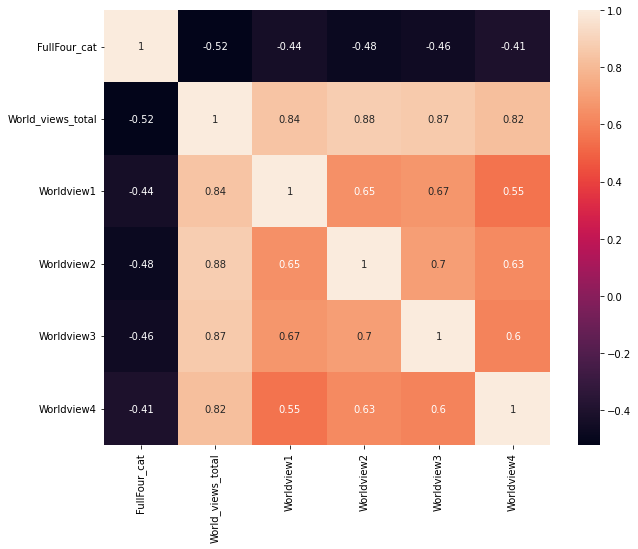

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df[['FullFour_cat', 'World_views_total', 'Worldview1', 'Worldview2', 'Worldview3', 'Worldview4']].corr(),annot=True)


In [ ]:
df = df[features_to_use]
df

,FullFour_cat,World_views_total,Worldview2,Worldview3,Worldview1,Depress_total,Anx_total,Worldview4,jAjD_PG,lectot,count_stressorsAjd,TE13,TE6,SE15,TE9,TE8,SE2,SE16,TE4,TE12,significantevent,SE3,TE14,TE15,abuse3,TE2,SE13,TE7,lost5y,SE12,TE5,TE16,SE9,SE10,SE14,SE5,SE8,TE1,SE4,abuse2,lost1y,Age,abuse5,abuse4,SE1,TE11,AgeCAT,abuse1,TE3
0,4,1.25,2,1,1,2.0,2.0,1,1,3,5,0,0,0,0,0,0,0,1,0,0,1,0,1,5,0,0,0,0,1,1,0,1,0,0,1,0,0,0,6,2,27,999,2,0,0,3,5,0
1,4,1.00,1,1,1,2.0,1.8,1,1,3,7,0,1,0,1,0,1,0,1,0,6,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,2,24,999,2,0,0,2,2,0
2,4,1.75,2,2,1,1.6,1.8,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,21,999,2,0,0,2,3,0
3,4,1.50,1,1,1,2.0,2.0,3,1,5,8,0,1,0,1,0,1,1,1,0,9,1,0,0,1,1,0,0,0,1,1,0,1,1,0,0,1,0,0,1,2,24,999,2,1,0,2,1,0
4,4,1.00,1,1,1,2.0,2.0,1,1,3,2,0,1,1,0,0,1,0,0,0,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,24,999,2,0,0,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,1,2.25,3,2,2,1.2,1.0,2,2,5,6,0,0,0,0,0,0,1,1,0,14,1,1,1,3,0,0,1,1,1,0,0,1,1,0,0,0,0,0,3,2,48,20,1,0,0,5,4,1
2520,1,2.75,3,1,2,1.8,1.2,5,0,6,7,1,1,1,1,1,0,0,0,0,8,0,0,0,1,0,0,0,2,1,0,1,0,0,0,1,1,0,1,1,1,31,999,2,0,0,3,1,0
2521,1,3.25,5,1,2,1.6,1.4,5,0,7,6,1,1,1,1,1,0,0,0,0,8,0,0,0,1,1,0,0,1,1,1,0,0,0,0,1,1,0,0,2,1,21,999,2,0,0,2,2,1
2522,1,3.00,1,5,1,1.0,1.4,5,2,7,10,0,1,1,1,1,1,0,1,1,7,1,0,0,1,0,0,1,2,1,1,0,0,1,0,1,1,0,1,1,2,31,999,2,0,0,3,1,0


In [ ]:
df_pt = df.drop('jAjD_PG', axis=1)

In [ ]:
df_pt

,FullFour_cat,World_views_total,Worldview2,Worldview3,Worldview1,Depress_total,Anx_total,Worldview4,lectot,count_stressorsAjd,TE13,TE6,SE15,TE9,TE8,SE2,SE16,TE4,TE12,significantevent,SE3,TE14,TE15,abuse3,TE2,SE13,TE7,lost5y,SE12,TE5,TE16,SE9,SE10,SE14,SE5,SE8,TE1,SE4,abuse2,lost1y,Age,abuse5,abuse4,SE1,TE11,AgeCAT,abuse1,TE3
0,4,1.25,2,1,1,2.0,2.0,1,3,5,0,0,0,0,0,0,0,1,0,0,1,0,1,5,0,0,0,0,1,1,0,1,0,0,1,0,0,0,6,2,27,999,2,0,0,3,5,0
1,4,1.00,1,1,1,2.0,1.8,1,3,7,0,1,0,1,0,1,0,1,0,6,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,2,24,999,2,0,0,2,2,0
2,4,1.75,2,2,1,1.6,1.8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,21,999,2,0,0,2,3,0
3,4,1.50,1,1,1,2.0,2.0,3,5,8,0,1,0,1,0,1,1,1,0,9,1,0,0,1,1,0,0,0,1,1,0,1,1,0,0,1,0,0,1,2,24,999,2,1,0,2,1,0
4,4,1.00,1,1,1,2.0,2.0,1,3,2,0,1,1,0,0,1,0,0,0,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,24,999,2,0,0,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,1,2.25,3,2,2,1.2,1.0,2,5,6,0,0,0,0,0,0,1,1,0,14,1,1,1,3,0,0,1,1,1,0,0,1,1,0,0,0,0,0,3,2,48,20,1,0,0,5,4,1
2520,1,2.75,3,1,2,1.8,1.2,5,6,7,1,1,1,1,1,0,0,0,0,8,0,0,0,1,0,0,0,2,1,0,1,0,0,0,1,1,0,1,1,1,31,999,2,0,0,3,1,0
2521,1,3.25,5,1,2,1.6,1.4,5,7,6,1,1,1,1,1,0,0,0,0,8,0,0,0,1,1,0,0,1,1,1,0,0,0,0,1,1,0,0,2,1,21,999,2,0,0,2,2,1
2522,1,3.00,1,5,1,1.0,1.4,5,7,10,0,1,1,1,1,1,0,1,1,7,1,0,0,1,0,0,1,2,1,1,0,0,1,0,1,1,0,1,1,2,31,999,2,0,0,3,1,0


In [ ]:
X = df_pt.drop(columns=['FullFour_cat'])
Y = df_pt['FullFour_cat']
split = StratifiedShuffleSplit(n_splits=1, random_state=40, test_size=0.3)
for train_index, test_index in split.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

print(len(y_test))

758


In [ ]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
numerical_variables = ['Age', 'AgeCAT', 'Depress_total', 'Anx_total', 'abuse1', 'abuse2', 'abuse3', 'abuse5', 'lost5y', 'Worldview1', 'Worldview2', 'Worldview3', 'Worldview4', 'World_views_total', 'lectot', 'count_stressorsAjd']
scaler.fit(X_train[numerical_variables])
X_train_scaled[numerical_variables] = scaler.transform(X_train_scaled[numerical_variables])
X_test_scaled[numerical_variables] = scaler.transform(X_test_scaled[numerical_variables])
X_train_scaled.describe()

,World_views_total,Worldview2,Worldview3,Worldview1,Depress_total,Anx_total,Worldview4,lectot,count_stressorsAjd,TE13,TE6,SE15,TE9,TE8,SE2,SE16,TE4,TE12,significantevent,SE3,TE14,TE15,abuse3,TE2,SE13,TE7,lost5y,SE12,TE5,TE16,SE9,SE10,SE14,SE5,SE8,TE1,SE4,abuse2,lost1y,Age,abuse5,abuse4,SE1,TE11,AgeCAT,abuse1,TE3
count,1.766000e+03,1.766000e+03,1.766000e+03,1.766000e+03,1.766000e+03,1.766000e+03,1.766000e+03,1.766000e+03,1.766000e+03,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1.766000e+03,1766.000000,1766.000000,1766.000000,1.766000e+03,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1.766000e+03,1766.000000,1.766000e+03,1.766000e+03,1766.000000,1766.000000,1766.000000,1.766000e+03,1.766000e+03,1766.000000
mean,-1.769064e-16,4.567883e-16,9.448840e-17,-2.055736e-16,2.691316e-16,-5.185232e-16,-7.292518e-17,1.335285e-16,-2.943411e-16,0.176104,0.515855,0.192525,0.278596,0.215742,0.544168,0.268403,0.304077,0.264439,5.464326,0.393545,0.114949,0.202718,-2.652968e-16,0.241789,0.219706,0.215742,-2.715834e-17,0.864666,0.214043,0.079841,0.592865,0.576444,0.118347,0.590600,0.597395,0.243488,0.285957,-1.623214e-16,1.460362,-7.254798e-17,3.162815e-16,1.806342,0.139864,0.053228,5.158828e-16,9.769460e-17,0.427520
std,1.000283e+00,1.000283e+00,1.000283e+00,1.000283e+00,1.000283e+00,1.000283e+00,1.000283e+00,1.000283e+00,1.000283e+00,0.381017,0.499890,0.394395,0.448435,0.411452,0.498186,0.443254,0.460146,0.441159,4.453808,0.488674,0.319051,0.402138,1.000283e+00,0.428289,0.414164,0.411452,1.000283e+00,0.342177,0.410273,0.271124,0.491440,0.494262,0.323110,0.491862,0.490561,0.429309,0.451997,1.000283e+00,0.498568,1.000283e+00,1.000283e+00,0.395276,0.346944,0.224551,1.000283e+00,1.000283e+00,0.494859
min,-1.164271e+00,-1.153667e+00,-9.071599e-01,-8.049079e-01,-1.921074e+00,-1.431825e+00,-1.070435e+00,-1.197059e+00,-2.145858e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.434103e-01,0.000000,0.000000,0.000000,-8.658680e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.798074e-01,1.000000,-1.560305e+00,-2.083211e+00,1.000000,0.000000,0.000000,-2.318361e+00,-7.832834e-01,0.000000
25%,-9.373532e-01,-1.153667e+00,-9.071599e-01,-8.049079e-01,-7.163096e-01,-8.935952e-01,-1.070435e+00,-8.701171e-01,-8.070183e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-5.434103e-01,0.000000,0.000000,0.000000,-8.658680e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.798074e-01,1.000000,-6.408094e-01,4.900622e-01,2.000000,0.000000,0.000000,-1.124205e-01,-7.832834e-01,0.000000
50%,-2.565996e-01,-3.888863e-01,-1.128890e-01,-8.049079e-01,-1.139273e-01,1.828640e-01,-3.419616e-01,-2.162333e-01,-1.375987e-01,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,-5.434103e-01,0.000000,0.000000,0.000000,-3.687539e-01,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-5.798074e-01,1.000000,-2.959985e-01,4.900622e-01,2.000000,0.000000,0.000000,-1.124205e-01,-7.832834e-01,0.000000
75%,6.510718e-01,1.140675e+00,6.813819e-01,7.877726e-01,1.090837e+00,1.259323e+00,1.114985e+00,4.376504e-01,8.665307e-01,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,0.000000,0.000000,5.558596e-01,0.000000,0.000000,0.000000,1.283601e-01,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,6.858784e-01,2.000000,5.085603e-01,4.900622e-01,2.000000,0.000000,0.000000,9.905499e-01,1.334021e-01,1.000000
max,2.466415e+00,1.905456e+00,2.269924e+00,2.380453e+00,1.090837e+00,1.259323e+00,1.843458e+00,3.70

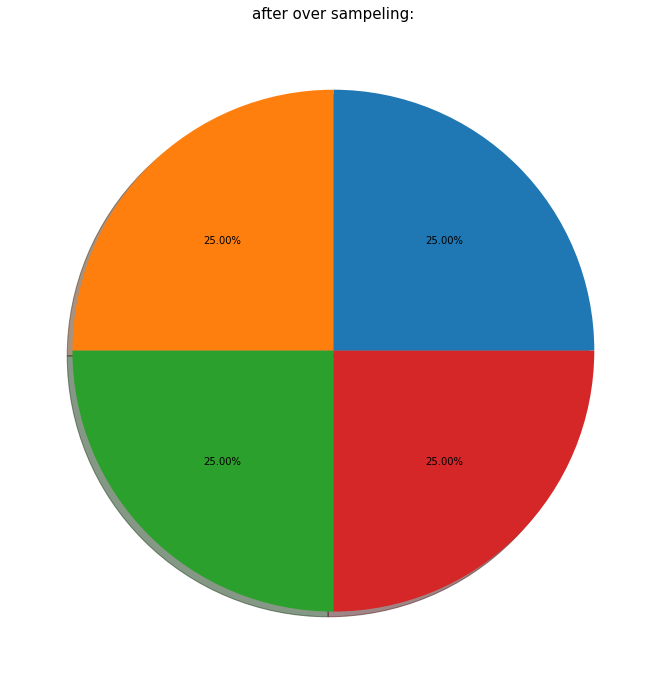

there are now equal number of each case: [1010, 1010, 1010, 1010]


In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X_train_scaled, y_train)
upsampled_df = X.assign(PTSD = y)

fig, ax = plt.subplots(1,1, figsize = (12,12))
values = upsampled_df['PTSD'].value_counts().tolist()

ax.pie(x=values, autopct="%1.2f%%", shadow=True)
ax.set_title("after over sampeling:", fontdict={'fontsize': 15})
plt.show()
print("there are now equal number of each case: " +str(values))

In [ ]:
upsampled_df

,World_views_total,Worldview2,Worldview3,Worldview1,Depress_total,Anx_total,Worldview4,lectot,count_stressorsAjd,TE13,TE6,SE15,TE9,TE8,SE2,SE16,TE4,TE12,significantevent,SE3,TE14,TE15,abuse3,TE2,SE13,TE7,lost5y,SE12,TE5,TE16,SE9,SE10,SE14,SE5,SE8,TE1,SE4,abuse2,lost1y,Age,abuse5,abuse4,SE1,TE11,AgeCAT,abuse1,TE3,PTSD
0,1.104907,1.140675,0.681382,0.787773,-1.921074,-1.431825,1.114985,1.745418,1.535950,0,1,1,1,1,1,1,1,0,14,1,1,1,0.555860,0,0,1,0.128360,1,0,0,1,1,0,0,1,1,0,0.685878,2,-0.295998,-2.041831,1,1,0,-0.112421,1.050088,1,1
1,-0.483517,-1.153667,-0.112889,-0.804908,-0.113927,1.259323,0.386512,-0.216233,-0.807018,0,1,0,1,0,0,0,0,0,9,0,0,0,-0.543410,0,0,0,0.128360,1,0,0,0,0,0,1,1,0,0,-0.579807,1,-1.100557,0.490062,2,0,0,-1.215391,-0.783283,1,4
2,1.331825,1.140675,1.475653,1.584113,-1.318692,-1.431825,0.386512,0.437650,1.870660,0,1,1,1,0,1,0,0,0,9,1,0,1,3.853669,1,1,0,0.128360,1,0,0,1,1,0,1,1,0,0,5.748622,1,0.738434,-2.028900,1,1,0,0.990550,2.883459,0,1
3,0.424154,1.140675,-0.112889,-0.008568,-0.113927,-1.431825,0.386512,-0.543175,1.201241,0,0,0,0,0,1,0,0,0,11,0,0,0,-0.543410,0,0,0,0.128360,1,0,0,1,1,1,1,1,0,1,-0.579807,1,-0.410935,0.490062,2,0,1,-0.112421,-0.783283,1,2
4,-0.710435,-1.153667,-0.907160,-0.804908,0.488455,0.721094,0.386512,-1.197059,-1.476438,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.543410,0,0,0,-0.865868,1,0,0,0,1,0,0,0,0,0,-0.579807,2,-0.755746,0.490062,2,0,0,-1.215391,0.133402,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,0.651072,0.375895,0.681382,0.787773,0.136117,0.121931,0.386512,-0.099029,0.354993,0,0,0,0,0,1,0,0,0,2,1,0,0,1.074382,0,0,0,0.625474,1,0,0,1,0,0,0,0,0,1,1.951564,1,2.724893,-0.692026,1,0,0,2.093520,1.914884,1,3
4036,0.585716,0.375895,0.681382,0.787773,-0.369317,-0.510385,0.176699,1.274594,0.389915,0,1,0,0,0,0,0,0,1,6,0,0,0,0.239252,0,0,1,-0.368754,1,0,0,1,1,0,1,1,0,0,-0.579807,2,-0.687686,-2.044769,1,0,0,-0.897717,-0.130619,0,3
4037,1.719139,1.028575,1.475653,2.263727,-1.230396,-0.972488,1.114985,1.139457,1.486889,0,0,1,0,0,1,0,1,0,7,0,0,0,-0.543410,1,0,1,2.116816,1,0,0,0,1,0,1,0,0,1,0.500356,1,-0.127526,0.490062,2,0,0,0.049251,-0.000964,1,3
4038,-0.097510,0.261594,-0.569378,0.211077,-0.716310,-0.355366,-0.233087,-0.494312,-0.279942,0,0,0,0,0,1,0,0,0,14,1,0,1,-0.543410,0,0,0,-0.580163,0,0,0,0,0,0,0,0,0,0,-0.579807,2,0.266817,-0.581183,1,0,0,0.521487,-0.783283,0,3


In [ ]:
categorial_variables = ['abuse4', 'lost1y', 'significantevent', 'TE1', 'TE2', 'TE3', 'TE4', 'TE5', 'TE6', 'TE7', 'TE8', 'TE9', 'TE11', 'TE12', 'TE13', 'TE14', 'TE15', 'TE16', 'SE1', 'SE2', 'SE3', 'SE4', 'SE5', 'SE8', 'SE9', 'SE10', 'SE12', 'SE13', 'SE14', 'SE15', 'SE16']

upsampled_df = pd.get_dummies(upsampled_df, columns=categorial_variables)
X_test_scaled = pd.get_dummies(X_test_scaled, columns=categorial_variables)
# df_result.rename(columns={"hypertension_0": "no_hypertension", "hypertension_1": "yes_hypertension", "heart_disease_0": "no_heart_disease", "heart_disease_1": "yes_heart_disease"}, inplace=True)

print(upsampled_df.columns.tolist())
upsampled_df

['World_views_total', 'Worldview2', 'Worldview3', 'Worldview1', 'Depress_total', 'Anx_total', 'Worldview4', 'lectot', 'count_stressorsAjd', 'abuse3', 'lost5y', 'abuse2', 'Age', 'abuse5', 'AgeCAT', 'abuse1', 'PTSD', 'abuse4_1', 'abuse4_2', 'lost1y_1', 'lost1y_2', 'significantevent_0', 'significantevent_1', 'significantevent_2', 'significantevent_3', 'significantevent_4', 'significantevent_5', 'significantevent_6', 'significantevent_7', 'significantevent_8', 'significantevent_9', 'significantevent_10', 'significantevent_11', 'significantevent_12', 'significantevent_13', 'significantevent_14', 'significantevent_15', 'significantevent_16', 'TE1_0', 'TE1_1', 'TE2_0', 'TE2_1', 'TE3_0', 'TE3_1', 'TE4_0', 'TE4_1', 'TE5_0', 'TE5_1', 'TE6_0', 'TE6_1', 'TE7_0', 'TE7_1', 'TE8_0', 'TE8_1', 'TE9_0', 'TE9_1', 'TE11_0', 'TE11_1', 'TE12_0', 'TE12_1', 'TE13_0', 'TE13_1', 'TE14_0', 'TE14_1', 'TE15_0', 'TE15_1', 'TE16_0', 'TE16_1', 'SE1_0', 'SE1_1', 'SE2_0', 'SE2_1', 'SE3_0', 'SE3_1', 'SE4_0', 'SE4_1', 'S

,World_views_total,Worldview2,Worldview3,Worldview1,Depress_total,Anx_total,Worldview4,lectot,count_stressorsAjd,abuse3,lost5y,abuse2,Age,abuse5,AgeCAT,abuse1,PTSD,abuse4_1,abuse4_2,lost1y_1,lost1y_2,significantevent_0,significantevent_1,significantevent_2,significantevent_3,significantevent_4,significantevent_5,significantevent_6,significantevent_7,significantevent_8,significantevent_9,significantevent_10,significantevent_11,significantevent_12,significantevent_13,significantevent_14,significantevent_15,significantevent_16,TE1_0,TE1_1,TE2_0,TE2_1,TE3_0,TE3_1,TE4_0,TE4_1,TE5_0,TE5_1,TE6_0,TE6_1,TE7_0,TE7_1,TE8_0,TE8_1,TE9_0,TE9_1,TE11_0,TE11_1,TE12_0,TE12_1,TE13_0,TE13_1,TE14_0,TE14_1,TE15_0,TE15_1,TE16_0,TE16_1,SE1_0,SE1_1,SE2_0,SE2_1,SE3_0,SE3_1,SE4_0,SE4_1,SE5_0,SE5_1,SE8_0,SE8_1,SE9_0,SE9_1,SE10_0,SE10_1,SE12_0,SE12_1,SE13_0,SE13_1,SE14_0,SE14_1,SE15_0,SE15_1,SE16_0,SE16_1
0,1.104907,1.140675,0.681382,0.787773,-1.921074,-1.431825,1.114985,1.745418,1.535950,0.555860,0.128360,0.685878,-0.295998,-2.041831,-0.112421,1.050088,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1
1,-0.483517,-1.153667,-0.112889,-0.804908,-0.113927,1.259323,0.386512,-0.216233,-0.807018,-0.543410,0.128360,-0.579807,-1.100557,0.490062,-1.215391,-0.783283,4,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0
2,1.331825,1.140675,1.475653,1.584113,-1.318692,-1.431825,0.386512,0.437650,1.870660,3.853669,0.128360,5.748622,0.738434,-2.028900,0.990550,2.883459,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0
3,0.424154,1.140675,-0.112889,-0.008568,-0.113927,-1.431825,0.386512,-0.543175,1.201241,-0.543410,0.128360,-0.579807,-0.410935,0.490062,-0.112421,-0.783283,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0
4,-0.710435,-1.153667,-0.907160,-0.804908,0.488455,0.721094,0.386512,-1.197059,-1.476438,-0.543410,-0.865868,-0.579807,-0.755746,0.490062,-1.215391,0.133402,4,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,0.651072,0.375895,0.681382,0.787773,0.136117,0.121931,0.386512,-0.099029,0.354993,1.074382,0.625474,1.951564,2.724893,-0.692026,2.093520,1.914884,3,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
4036,0.585716,0.375895,0.681382,0.787773,-0.369317,-0.510385,0.176699,1.274594,0.389915,0.239252,-0.368754,-0.579807,-0.687686,-2.044769,-0.897717,-0.130619,3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0
4037,1.719139,1.028575,1.475653,2.263727,-1.230396,-0.972488,1.114985,1.139457,1.486889,-0.543410,2.116816,0.500356,-0.127526,0.490062,0.049251,-0.000964,3,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0
4038,-0.097510,0.261594,-0.569378,0.211077,-0.716310,-0.355366,-0.233087,-0.494312,-0.279942,-0.543410,-0.580163,-0.579807,0.266817,-0.581183,0.521487,-0.783283,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,

In [ ]:

def accuracy_fb_recall_precision_CV(model, X_train, y_train):
    accuracy = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kf).mean()
    recall = cross_val_score(model, X_train, y_train, scoring='recall', cv=kf, avarage='micro').mean()
    precision = cross_val_score(model, X_train, y_train, scoring='precision', cv=kf).mean()
    fb_score = (1+beta**2)*precision*recall / ((beta**2)*precision + recall)
    return accuracy, fb_score, recall, precision

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
X = upsampled_df.drop('PTSD', axis=1)
y = upsampled_df['PTSD']
kf = KFold(n_splits=5, random_state=40, shuffle=True)
accuracy = cross_val_score(clf, X, y, scoring='accuracy', cv=kf).mean()

accuracy

array([0.8799505 , 0.83168317, 0.8230198 , 0.83292079, 0.83539604])

In [ ]:
upsampled_df

,World_views_total,Worldview2,Worldview3,Worldview1,Depress_total,Anx_total,Worldview4,lectot,count_stressorsAjd,abuse3,lost5y,abuse2,Age,abuse5,AgeCAT,abuse1,PTSD,abuse4_1,abuse4_2,lost1y_1,lost1y_2,significantevent_0,significantevent_1,significantevent_2,significantevent_3,significantevent_4,significantevent_5,significantevent_6,significantevent_7,significantevent_8,significantevent_9,significantevent_10,significantevent_11,significantevent_12,significantevent_13,significantevent_14,significantevent_15,significantevent_16,TE1_0,TE1_1,TE2_0,TE2_1,TE3_0,TE3_1,TE4_0,TE4_1,TE5_0,TE5_1,TE6_0,TE6_1,TE7_0,TE7_1,TE8_0,TE8_1,TE9_0,TE9_1,TE11_0,TE11_1,TE12_0,TE12_1,TE13_0,TE13_1,TE14_0,TE14_1,TE15_0,TE15_1,TE16_0,TE16_1,SE1_0,SE1_1,SE2_0,SE2_1,SE3_0,SE3_1,SE4_0,SE4_1,SE5_0,SE5_1,SE8_0,SE8_1,SE9_0,SE9_1,SE10_0,SE10_1,SE12_0,SE12_1,SE13_0,SE13_1,SE14_0,SE14_1,SE15_0,SE15_1,SE16_0,SE16_1
0,1.104907,1.140675,0.681382,0.787773,-1.921074,-1.431825,1.114985,1.745418,1.535950,0.555860,0.128360,0.685878,-0.295998,-2.041831,-0.112421,1.050088,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1
1,-0.483517,-1.153667,-0.112889,-0.804908,-0.113927,1.259323,0.386512,-0.216233,-0.807018,-0.543410,0.128360,-0.579807,-1.100557,0.490062,-1.215391,-0.783283,4,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0
2,1.331825,1.140675,1.475653,1.584113,-1.318692,-1.431825,0.386512,0.437650,1.870660,3.853669,0.128360,5.748622,0.738434,-2.028900,0.990550,2.883459,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0
3,0.424154,1.140675,-0.112889,-0.008568,-0.113927,-1.431825,0.386512,-0.543175,1.201241,-0.543410,0.128360,-0.579807,-0.410935,0.490062,-0.112421,-0.783283,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0
4,-0.710435,-1.153667,-0.907160,-0.804908,0.488455,0.721094,0.386512,-1.197059,-1.476438,-0.543410,-0.865868,-0.579807,-0.755746,0.490062,-1.215391,0.133402,4,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,0.651072,0.375895,0.681382,0.787773,0.136117,0.121931,0.386512,-0.099029,0.354993,1.074382,0.625474,1.951564,2.724893,-0.692026,2.093520,1.914884,3,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
4036,0.585716,0.375895,0.681382,0.787773,-0.369317,-0.510385,0.176699,1.274594,0.389915,0.239252,-0.368754,-0.579807,-0.687686,-2.044769,-0.897717,-0.130619,3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0
4037,1.719139,1.028575,1.475653,2.263727,-1.230396,-0.972488,1.114985,1.139457,1.486889,-0.543410,2.116816,0.500356,-0.127526,0.490062,0.049251,-0.000964,3,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0
4038,-0.097510,0.261594,-0.569378,0.211077,-0.716310,-0.355366,-0.233087,-0.494312,-0.279942,-0.543410,-0.580163,-0.579807,0.266817,-0.581183,0.521487,-0.783283,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,

In [ ]:
X_test_scaled

,World_views_total,Worldview2,Worldview3,Worldview1,Depress_total,Anx_total,Worldview4,lectot,count_stressorsAjd,abuse3,lost5y,abuse2,Age,abuse5,AgeCAT,abuse1,abuse4_1,abuse4_2,lost1y_1,lost1y_2,significantevent_0,significantevent_1,significantevent_2,significantevent_3,significantevent_4,significantevent_5,significantevent_6,significantevent_7,significantevent_8,significantevent_9,significantevent_10,significantevent_11,significantevent_12,significantevent_13,significantevent_14,significantevent_15,significantevent_16,TE1_0,TE1_1,TE2_0,TE2_1,TE3_0,TE3_1,TE4_0,TE4_1,TE5_0,TE5_1,TE6_0,TE6_1,TE7_0,TE7_1,TE8_0,TE8_1,TE9_0,TE9_1,TE11_0,TE11_1,TE12_0,TE12_1,TE13_0,TE13_1,TE14_0,TE14_1,TE15_0,TE15_1,TE16_0,TE16_1,SE1_0,SE1_1,SE2_0,SE2_1,SE3_0,SE3_1,SE4_0,SE4_1,SE5_0,SE5_1,SE8_0,SE8_1,SE9_0,SE9_1,SE10_0,SE10_1,SE12_0,SE12_1,SE13_0,SE13_1,SE14_0,SE14_1,SE15_0,SE15_1,SE16_0,SE16_1
1380,-0.029682,-0.388886,-0.112889,-0.008568,1.090837,1.259323,0.386512,0.110709,1.870660,-0.543410,-0.865868,-0.579807,0.163749,0.490062,-0.112421,0.133402,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1
2333,0.197236,-0.388886,-0.112889,0.787773,0.488455,0.182864,0.386512,0.764592,-0.137599,-0.543410,-0.368754,-0.579807,-0.181062,0.490062,-0.112421,-0.783283,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
658,-0.937353,-1.153667,-0.907160,-0.008568,1.090837,1.259323,-1.070435,-1.197059,-0.807018,-0.543410,0.625474,-0.579807,3.152110,0.490062,2.093520,-0.783283,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0
1847,1.331825,1.905456,0.681382,-0.008568,-0.716310,-0.893595,1.843458,2.072360,1.201241,1.655130,0.128360,0.685878,-0.640809,0.490062,-0.112421,0.133402,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0
1943,-0.937353,-0.388886,-0.907160,-0.804908,-1.318692,-1.431825,-1.070435,0.437650,1.201241,0.555860,0.625474,-0.579807,-1.100557,0.490062,-1.215391,-0.783283,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,-0.256600,1.140675,-0.112889,-0.804908,-0.113927,0.182864,-1.070435,0.764592,0.866531,-0.543410,-0.368754,-0.579807,-0.525872,0.490062,-0.112421,1.050088,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0
289,-0.256600,-1.153667,-0.907160,0.787773,-1.318692,-0.355366,0.386512,-0.543175,1.535950,-0.543410,0.625474,0.685878,1.313119,0.490062,0.990550,0.133402,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1
1492,-1.164271,-1.153667,-0.907160,-0.804908,1.090837,1.259323,-1.070435,-1.197059,-1.476438,-0.543410,-0.865868,0.685878,0.508560,0.490062,0.990550,0.133402,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
976,1.785661,0.375895,1.475653,2.380453,-0.113927,-0.355366,1.843458,0.437650,0.866531,2.754399,0.625474,0.685878,0.048812,0.490062,-0.112421,1.050088,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,

In [ ]:
upsampled_df

,World_views_total,Worldview2,Worldview3,Worldview1,Depress_total,Anx_total,Worldview4,lectot,count_stressorsAjd,abuse3,lost5y,abuse2,Age,abuse5,AgeCAT,abuse1,PTSD,abuse4_1,abuse4_2,lost1y_1,lost1y_2,significantevent_0,significantevent_1,significantevent_2,significantevent_3,significantevent_4,significantevent_5,significantevent_6,significantevent_7,significantevent_8,significantevent_9,significantevent_10,significantevent_11,significantevent_12,significantevent_13,significantevent_14,significantevent_15,significantevent_16,TE1_0,TE1_1,TE2_0,TE2_1,TE3_0,TE3_1,TE4_0,TE4_1,TE5_0,TE5_1,TE6_0,TE6_1,TE7_0,TE7_1,TE8_0,TE8_1,TE9_0,TE9_1,TE11_0,TE11_1,TE12_0,TE12_1,TE13_0,TE13_1,TE14_0,TE14_1,TE15_0,TE15_1,TE16_0,TE16_1,SE1_0,SE1_1,SE2_0,SE2_1,SE3_0,SE3_1,SE4_0,SE4_1,SE5_0,SE5_1,SE8_0,SE8_1,SE9_0,SE9_1,SE10_0,SE10_1,SE12_0,SE12_1,SE13_0,SE13_1,SE14_0,SE14_1,SE15_0,SE15_1,SE16_0,SE16_1
0,1.104907,1.140675,0.681382,0.787773,-1.921074,-1.431825,1.114985,1.745418,1.535950,0.555860,0.128360,0.685878,-0.295998,-2.041831,-0.112421,1.050088,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1
1,-0.483517,-1.153667,-0.112889,-0.804908,-0.113927,1.259323,0.386512,-0.216233,-0.807018,-0.543410,0.128360,-0.579807,-1.100557,0.490062,-1.215391,-0.783283,4,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0
2,1.331825,1.140675,1.475653,1.584113,-1.318692,-1.431825,0.386512,0.437650,1.870660,3.853669,0.128360,5.748622,0.738434,-2.028900,0.990550,2.883459,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0
3,0.424154,1.140675,-0.112889,-0.008568,-0.113927,-1.431825,0.386512,-0.543175,1.201241,-0.543410,0.128360,-0.579807,-0.410935,0.490062,-0.112421,-0.783283,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0
4,-0.710435,-1.153667,-0.907160,-0.804908,0.488455,0.721094,0.386512,-1.197059,-1.476438,-0.543410,-0.865868,-0.579807,-0.755746,0.490062,-1.215391,0.133402,4,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,-1.099685,-1.023063,-0.907160,-0.804908,-1.284402,-1.431825,-0.987499,0.708759,0.493715,-0.543410,-0.340456,-0.579807,-0.282913,0.490062,-0.112421,-0.783283,3,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0
4036,0.476675,0.464401,1.383733,0.787773,-0.113927,-0.293077,-0.901825,-1.045713,0.866531,-0.543410,0.567944,-0.579807,-0.437538,0.490062,-0.112421,0.133402,3,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0
4037,0.424154,0.375895,0.544410,-0.008568,0.093835,0.813911,0.512137,-0.870117,-0.137599,-0.543410,-0.780140,-0.579807,-0.482242,0.490062,-0.112421,-0.783283,3,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
4038,1.025551,1.140675,0.145362,0.250357,0.081933,-0.530367,1.843458,0.437650,1.318293,-0.543410,-0.194906,0.685878,-0.138042,0.490062,-0.112421,0.133402,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,

0.6213720316622692
0.44099796544708436


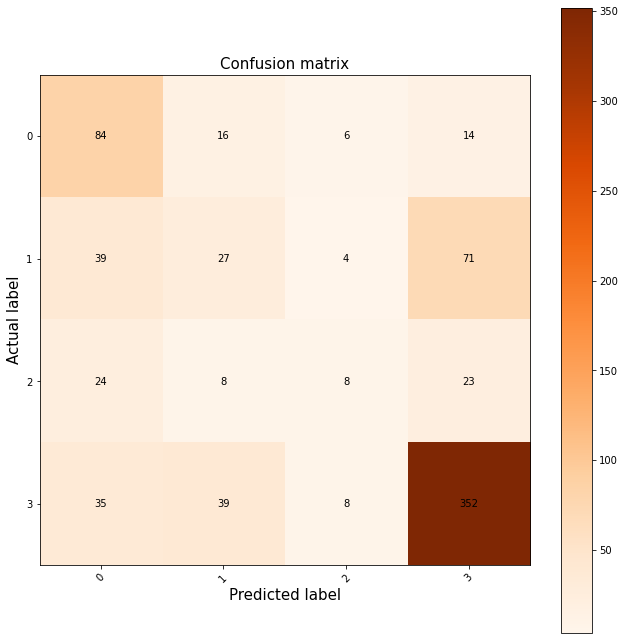

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

X = upsampled_df.drop('PTSD', axis=1)
y = upsampled_df['PTSD']
clf.fit(X, y)

y_predict = clf.predict(X_test_scaled)
print(accuracy_score(y_predict, y_test))

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict, pos_label=2)
print(metrics.auc(fpr, tpr))


y_pred_series = pd.Series(y_predict, index = y_test.index)

cm = confusion_matrix(y_test, y_pred_series)
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Oranges')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(4)
plt.xticks(tick_marks, rotation=45, size = 10)
plt.yticks(tick_marks, size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.579155672823219


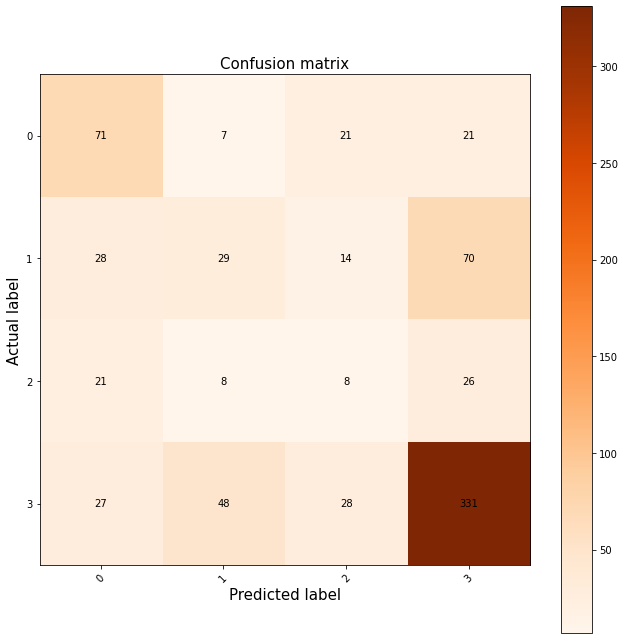

In [ ]:
 from sklearn.neural_network import MLPClassifier
clf =  MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16, 12, 8), random_state=1)

X = upsampled_df.drop('PTSD', axis=1)
y = upsampled_df['PTSD']
clf.fit(X, y)

y_predict = clf.predict(X_test_scaled)
print(accuracy_score(y_predict, y_test))


y_pred_series = pd.Series(y_predict, index = y_test.index)

cm = confusion_matrix(y_test, y_pred_series)
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Oranges')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(4)
plt.xticks(tick_marks, rotation=45, size = 10)
plt.yticks(tick_marks, size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.6147757255936676


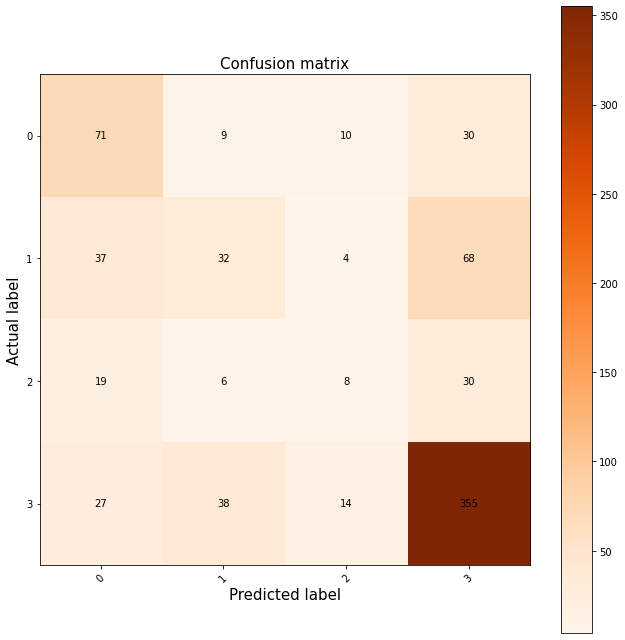

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
X = upsampled_df.drop('PTSD', axis=1)
y = upsampled_df['PTSD']
clf.fit(X, y)

y_predict = clf.predict(X_test_scaled)
print(accuracy_score(y_predict, y_test))


y_pred_series = pd.Series(y_predict, index = y_test.index)

cm = confusion_matrix(y_test, y_pred_series)
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Oranges')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(4)
plt.xticks(tick_marks, rotation=45, size = 10)
plt.yticks(tick_marks, size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

0.48812664907651715


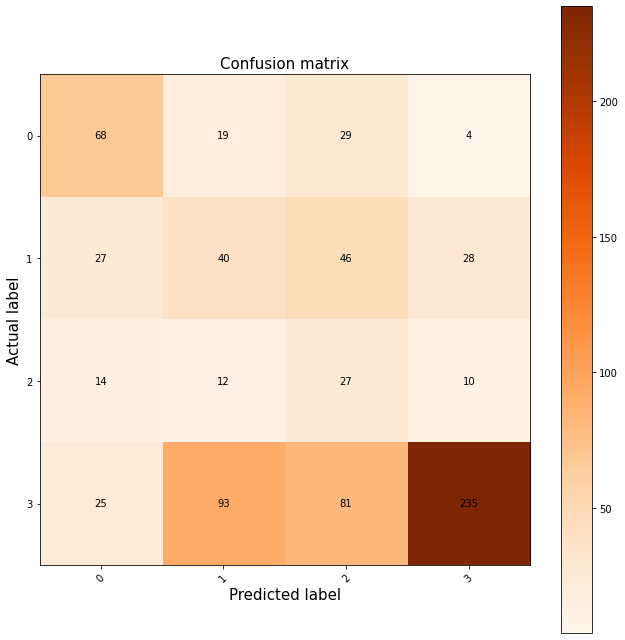

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=120)

X = upsampled_df.drop('PTSD', axis=1)
y = upsampled_df['PTSD']
clf.fit(X, y)

y_predict = clf.predict(X_test_scaled)
print(accuracy_score(y_predict, y_test))


y_pred_series = pd.Series(y_predict, index = y_test.index)

cm = confusion_matrix(y_test, y_pred_series)
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Oranges')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(4)
plt.xticks(tick_marks, rotation=45, size = 10)
plt.yticks(tick_marks, size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')